## HMM

1. Data Preprocessing
2. Implement the Hidden Markov Model (HMM) 
3. Model Training
4. Prediction 
5. Evaluation
6. Visualization


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
dataset = pd.read_csv('Weather Data.csv')
type(dataset)

pandas.core.frame.DataFrame

In [51]:
dataset.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


1. Data Preprocessing
    - Data Reduction
    - Data transformation
    - Feature Selection
    - Feature Scaling
    - Handling Missing Values
    - Encoding

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [53]:
dataset.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [54]:
# Handling Missing Data (The following dataset fortunately has no missing value.)
print(dataset.isnull().sum())
# If there is any missing value, I'd remove them happily. I'm not interested in Imputation.
_ = dataset.dropna()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [55]:
# Convert 'Data/Time' column from object datatype to datetime.
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


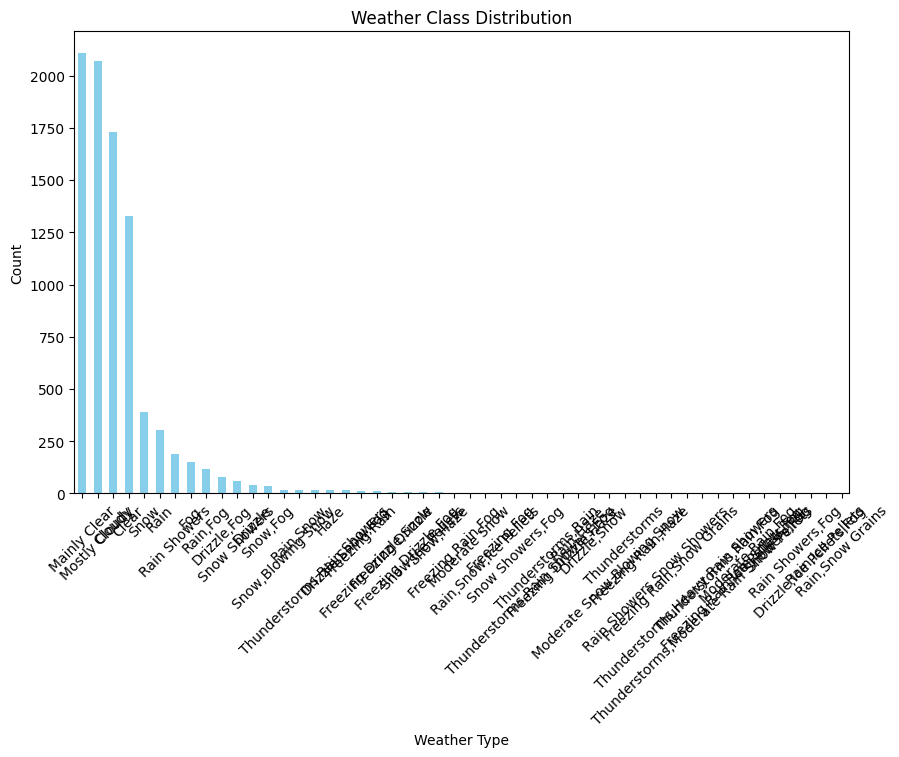

In [56]:
# Visualization: Weather Class Distribution
plt.figure(figsize=(10, 6))
dataset['Weather'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Weather Class Distribution")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [57]:
dataset['Weather'].value_counts().count() # 50
dataset['Weather'].value_counts().sum()   # 8784
value_counts = dataset['Weather'].value_counts()
value_counts

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [58]:
# dataset_revised = dataset[dataset['Weather'].isin(valu)]
dataset_revised = dataset[dataset['Weather'].isin(value_counts[value_counts >= 16].index)]

print(dataset_revised['Weather'].value_counts().count()) # 17
print(dataset_revised['Weather'].value_counts().sum())   # 8706
print(dataset_revised['Weather'].value_counts())


17
8666
Weather
Mainly Clear                  2106
Mostly Cloudy                 2069
Cloudy                        1728
Clear                         1326
Snow                           390
Rain                           306
Rain Showers                   188
Fog                            150
Rain,Fog                       116
Drizzle,Fog                     80
Snow Showers                    60
Drizzle                         41
Snow,Fog                        37
Snow,Blowing Snow               19
Rain,Snow                       18
Haze                            16
Thunderstorms,Rain Showers      16
Name: count, dtype: int64


In [59]:
def categorize_weather(condition:str):
    condition = condition.lower()
    if 'clear' in condition:
        return 'clear'
    elif 'cloudy' in condition:
        return 'cloudy'
    elif condition in ['rain', 'rain,fog', 'drizzle,fog', 'drizzle']:
        return 'rain'
    elif condition in ['snow', 'snow,fog']:
        return 'snow'
    elif condition in ['fog', 'haze']:
        return 'fog'
    elif condition in ['rain showers', 'thunderstorms,rain showers']:
        return 'rain showers'
    elif condition in ['snow showers', 'snow,blowing snow', 'rain,snow']:
        return 'snow showers'

In [60]:
# Step 3: Apply the categorization function
dataset_revised['Weather'] = dataset_revised['Weather'].apply(categorize_weather)

print(dataset_revised['Weather'].value_counts().count()) # 7
print(dataset_revised['Weather'].value_counts().sum())   # 8666
print(dataset_revised['Weather'].value_counts())

dataset_revised.head()

7
8666
Weather
cloudy          3797
clear           3432
rain             543
snow             427
rain showers     204
fog              166
snow showers      97
Name: count, dtype: int64


/tmp/ipykernel_4720/1838584516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_revised['Weather'] = dataset_revised['Weather'].apply(categorize_weather)


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,fog
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,fog


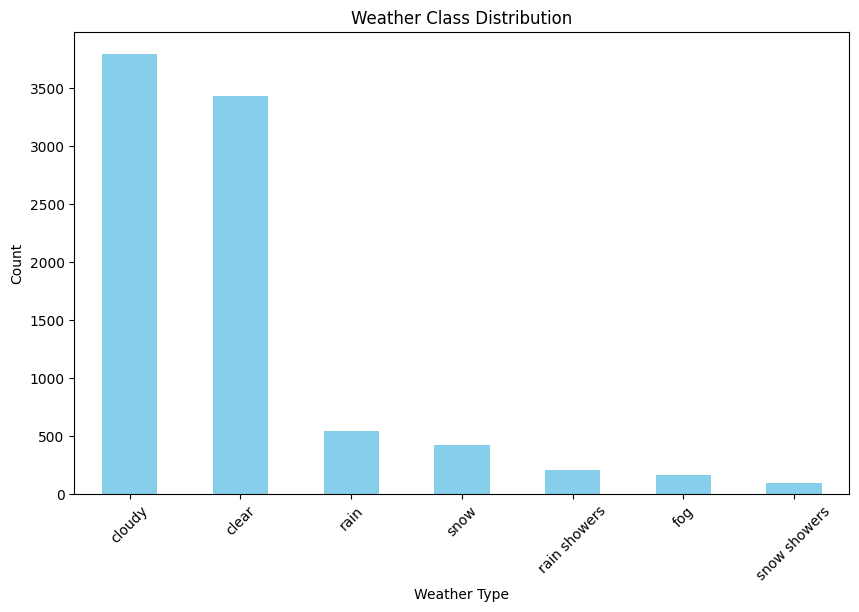

In [61]:
# Visualization: Weather Class Distribution
plt.figure(figsize=(10, 6))
dataset_revised['Weather'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Weather Class Distribution")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [62]:
# Converting Weather column from str to number
dataset_revised['Weather'] = dataset_revised['Weather'].replace({'cloudy':0, 'rain':1, 'snow':2, 'fog':3, 'rain showers':4, 'snow showers':5, 'clear': 6})
dataset_revised.head()

/tmp/ipykernel_4720/1318711850.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_revised['Weather'] = dataset_revised['Weather'].replace({'cloudy':0, 'rain':1, 'snow':2, 'fog':3, 'rain showers':4, 'snow showers':5, 'clear': 6})
/tmp/ipykernel_4720/1318711850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_revised['Weather'] = dataset_revised['Weather'].replace({'cloudy':0, 'rain':1, 'snow':2, 'fog':3, 'rain showers':4, 'snow showers':5, 'clear': 6})


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,3
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,3
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,3
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,3
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,3


In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset_revised['Temp_C'] = scaler.fit_transform(dataset_revised[['Temp_C']])
dataset_revised['Dew Point Temp_C'] = scaler.fit_transform(dataset_revised[['Dew Point Temp_C']])
dataset_revised['Rel Hum_%'] = scaler.fit_transform(dataset_revised[['Rel Hum_%']])
dataset_revised['Press_kPa'] = scaler.fit_transform(dataset_revised[['Press_kPa']])
dataset_revised['Visibility_km'] = scaler.fit_transform(dataset_revised[['Visibility_km']])
dataset_revised['Wind Speed_km/h'] = scaler.fit_transform(dataset_revised[['Wind Speed_km/h']])

dataset_revised.head()


/tmp/ipykernel_4720/1770144031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_revised['Temp_C'] = scaler.fit_transform(dataset_revised[['Temp_C']])
/tmp/ipykernel_4720/1770144031.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_revised['Dew Point Temp_C'] = scaler.fit_transform(dataset_revised[['Dew Point Temp_C']])
/tmp/ipykernel_4720/1770144031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,0.381883,0.465028,0.829268,0.048193,0.162162,0.606852,3
1,2012-01-01 01:00:00,0.381883,0.468809,0.841463,0.048193,0.162162,0.606852,3
4,2012-01-01 04:00:00,0.387211,0.476371,0.853659,0.084337,0.095634,0.605220,3
5,2012-01-01 05:00:00,0.388988,0.476371,0.841463,0.108434,0.128898,0.611746,3
6,2012-01-01 06:00:00,0.387211,0.480151,0.865854,0.084337,0.128898,0.615008,3


2. Implement the Hidden Markov Model (HMM) 


In [64]:
from hmmlearn.hmm import GaussianHMM

In [65]:
features = dataset_revised[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].values
labels = dataset_revised['Weather'].values

print(features.shape, labels.shape)
print(type(features), type(labels))
features[0]

(8666, 6) (8666,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([0.38188277, 0.46502836, 0.82926829, 0.04819277, 0.16216216,
       0.60685155])

In [66]:
# Define the number of hidden states
n_states = len(np.unique(labels))

# Define the number of observed features
n_features = 1

# Initialize the HMM model
# hmm_model = GaussianHMM(n_components=len(np.unique(y_train)), covariance_type='diag', n_iter=100, random_state=42)
model = GaussianHMM(n_components=n_states, covariance_type="full", n_iter=1000)


3. Model Training
    - Split The Dataset Into Training and Test Sets.
    - Fit The Model

In [67]:
from sklearn.model_selection import train_test_split

In [68]:

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)


# Fit the model to the data
model.fit(X_train)


GaussianHMM(covariance_type='full', n_components=7, n_iter=1000)

4. Prediction 

In [69]:
# Predict the hidden states
hidden_states = model.predict(X_test)

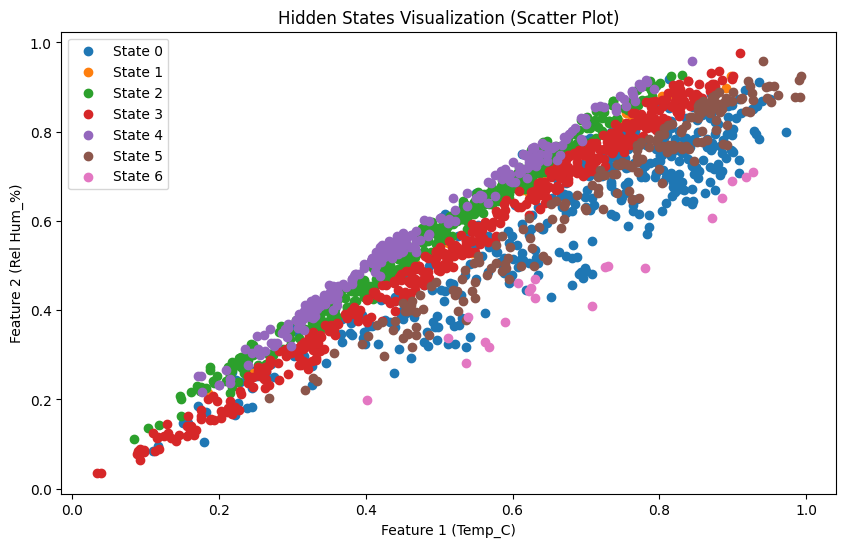

In [70]:
# Visualization: Scatter plot of hidden states
plt.figure(figsize=(10, 6))
for i in range(model.n_components):
    state_points = X_test[hidden_states == i]
    plt.scatter(state_points[:, 0], state_points[:, 1], label=f"State {i}")

plt.title("Hidden States Visualization (Scatter Plot)")
plt.xlabel("Feature 1 (Temp_C)")
plt.ylabel("Feature 2 (Rel Hum_%)")
plt.legend()
plt.show()

5. Evaluation
    - Confusion Matrix
    - Accuracy
    - Precision
    - Recall
    - F1 Score
    - ROC Curve
    - AUC (Area Under The Curve)
    - MAE
    - MSE
    - RMSE
    - MAPE

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.mixture import GaussianMixture
from scipy.stats import mode

In [74]:
accuracy = np.mean(hidden_states == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.11534025374855825


In [75]:
# Evaluate the model
# accuracy_gmm = accuracy_score(y_test, hidden_states)
classification_rep_gmm = classification_report(y_test, hidden_states)
conf_matrix_gmm = confusion_matrix(y_test, hidden_states)

# Print the results
# print("Accuracy:", accuracy_gmm)
print("\nClassification Report:\n", classification_rep_gmm)
print("\nConfusion Matrix:\n", conf_matrix_gmm)


Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.22      0.28       760
           1       0.23      0.06      0.10       109
           2       0.03      0.14      0.05        85
           3       0.00      0.00      0.00        33
           4       0.03      0.17      0.05        41
           5       0.00      0.00      0.00        19
           6       0.48      0.01      0.03       687

    accuracy                           0.12      1734
   macro avg       0.17      0.09      0.07      1734
weighted avg       0.39      0.12      0.15      1734


Confusion Matrix:
 [[164  13 207 242  38  85  11]
 [  1   7  19   2  78   2   0]
 [  0   2  12   6  65   0   0]
 [  0   0   0   0  33   0   0]
 [  0   2  13  15   7   4   0]
 [  0   0   4   4  11   0   0]
 [227   7 133 198  15  97  10]]


6. Visualization

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

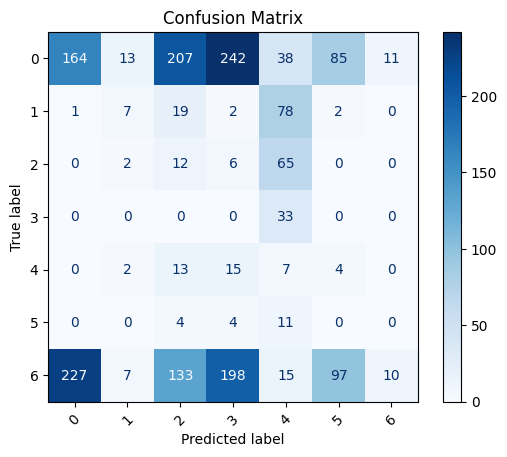

In [77]:

# Visualization: Confusion Matrix
conf_matrix = confusion_matrix(y_test, hidden_states)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


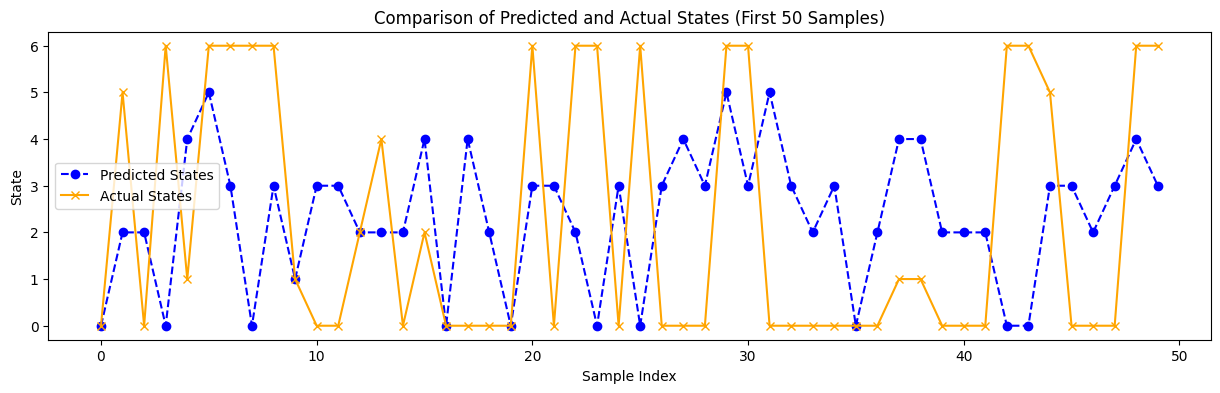

In [78]:
# Visualization: State Transitions (Optional)
plt.figure(figsize=(15, 4))
plt.plot(hidden_states[:50], label='Predicted States', color='blue', marker='o', linestyle='--')
plt.plot(y_test[:50], label='Actual States', color='orange', marker='x')
plt.title("Comparison of Predicted and Actual States (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("State")
plt.legend()
plt.show()